In [1]:
import cv2
import numpy as np

In [2]:
import cv2
import numpy as np

# Capture video from webcam or video file
cap = cv2.VideoCapture('D:/place_ROIs_project/Phase4_NewRelabelingVersionAndAnalysingActivity/AnalysisAllFrames/PreferedMovieSegmentsEachPatch/Patch4/Most11.mp4')

# Read the first frame
ret, frame1 = cap.read()
prev_gray = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)

# Create a mask for visualizing the flow
mask = np.zeros_like(frame1)
# frame_counter = 1
frames_variance_list = []

while True:
    # Read the next frame
#     frame_counter += 1
    ret, frame2 = cap.read()
    if not ret:
        break

    # Convert the current frame to grayscale
    gray = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

    # Calculate dense optical flow using Farneback method
    flow = cv2.calcOpticalFlowFarneback(prev_gray, gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    
    
    # Compute the magnitude and angle of the flow vectors
    magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])
    magnitude = magnitude.flatten()
    frames_variance_list.append(np.mean(magnitude))
    prev_gray = gray

    # Break the loop if the 'q' key is pressed
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

# Release the capture and close all windows
cap.release()
cv2.destroyAllWindows()


In [70]:
frames_variance_list = np.array(frames_variance_list)


In [71]:
np.argmax(frames_variance_list)

22

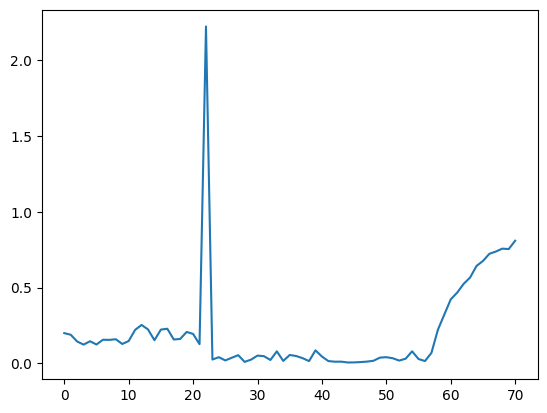

In [3]:
import matplotlib.pyplot as plt
frames_variance_list = np.array(frames_variance_list)
x = np.arange(len(frames_variance_list))
plt.plot(x, frames_variance_list)

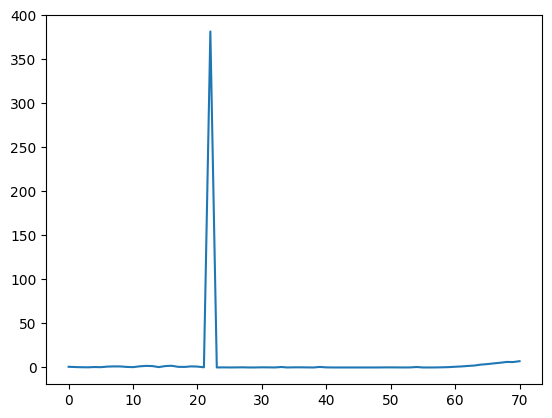

In [69]:
import matplotlib.pyplot as plt
frames_variance_list = np.array(frames_variance_list)
x = np.arange(len(frames_variance_list))
plt.plot(x, frames_variance_list)

In [52]:
np.argsort(frames_variance_list)

array([ 2,  3,  1,  5,  4,  0,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 21, 19, 20, 22, 23, 25, 26, 24, 27, 28, 29, 30, 34, 32, 31, 40,
       41, 33, 39, 42, 43, 35, 44, 45, 46, 38, 47, 67, 48,  6, 68, 49, 66,
       50, 65, 69, 51, 53, 52, 64, 55, 37, 62, 54, 56, 57, 70, 58, 59, 36,
       61, 63, 60], dtype=int64)

In [53]:
len(frames_variance_list)

71

In [42]:
frames_variance_list[60:70]

array([  9.961699 ,   4.990569 ,  12.04893  ,   5.9003067,   2.6308668,
         5.943342 ,   4.008279 ,   3.8150268, 834.5766   ,   4.239609 ],
      dtype=float32)

In [58]:
import cv2

def show_successive_frames(video_path, start_frame, num_frames, delay=30):
    # Open the video file
    cap = cv2.VideoCapture(video_path)
    
    # Check if video opened successfully
    if not cap.isOpened():
        print("Error: Could not open video.")
        return
    
    # Set the starting frame position
    cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)
    
    for i in range(num_frames):
        # Read the frame
        ret, frame = cap.read()
        
        if not ret:
            print(f"Error: Could not read frame number {start_frame + i}.")
            break
        
        # Display the frame
        cv2.imshow('Video', frame)
        
        # Wait for the specified delay (in milliseconds)
        if cv2.waitKey(delay) & 0xFF == ord('q'):
            break
    
    # Release the video capture object and close windows
    cap.release()
    cv2.destroyAllWindows()

# Example usage
video_path = 'D:/place_ROIs_project/Phase4_NewRelabelingVersionAndAnalysingActivity/AnalysisAllFrames/PreferedMovieSegmentsEachPatch/Patch4/Most4.mp4'
start_frame = 58  # Starting frame number
num_frames = 10  # Number of frames to display
delay = 100        # Delay between frames in milliseconds (e.g., 30 ms for ~33 FPS)
show_successive_frames(video_path, start_frame, num_frames, delay)


In [61]:
import cv2
import numpy as np

# Define the start and end times in seconds
start_time = 1  
end_time = 2  

# Capture video from a video file
cap = cv2.VideoCapture('D:/place_ROIs_project/Phase4_NewRelabelingVersionAndAnalysingActivity/AnalysisAllFrames/PreferedMovieSegmentsEachPatch/Patch2/Most3.mp4')

# Get the frame rate of the video
fps = cap.get(cv2.CAP_PROP_FPS)

# Calculate the start and end frames
start_frame = int(start_time * fps)
end_frame = int(end_time * fps)

# Set the video capture to start at the start frame
cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)

# Read the first frame from the start frame
ret, frame1 = cap.read()
if not ret:
    print("Failed to read the first frame.")
    cap.release()
    exit()

prev_gray = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)

# Create a mask for visualizing the flow
mask = np.zeros_like(frame1)

frame_counter = start_frame
while frame_counter < end_frame:
    # Read the next frame
    ret, frame2 = cap.read()
    if not ret:
        break

    # Convert the current frame to grayscale
    gray = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

    # Calculate dense optical flow using Farneback method
    flow = cv2.calcOpticalFlowFarneback(prev_gray, gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)

    # Compute the magnitude and angle of the flow vectors
    magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])

    # Set the hue based on the angle and normalize the magnitude
    mask[..., 0] = angle * 180 / np.pi / 2
    mask[..., 2] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)

    # Convert HSV to BGR
    flow_color = cv2.cvtColor(mask, cv2.COLOR_HSV2BGR)

    # Draw motion vectors on the frame
    step = 16
    for y in range(0, frame2.shape[0], step):
        for x in range(0, frame2.shape[1], step):
            dx, dy = flow[y, x]
            cv2.arrowedLine(frame2, (x, y), (int(x + dx), int(y + dy)), (0, 255, 0), 1, tipLength=0.5)

    # Display the resulting frame
    cv2.imshow('Dense Optical Flow with Motion Vectors', frame2)

    # Update the previous frame
    prev_gray = gray

    # Break the loop if the 'q' key is pressed
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

    frame_counter += 1

# Release the capture and close all windows
cap.release()
cv2.destroyAllWindows()


In [62]:
import cv2
import numpy as np

# Define the start and end frames
start_frame = 0  # for example, start at frame 150
end_frame = 10   # end at frame 450

# Capture video from a video file
cap = cv2.VideoCapture('D:/place_ROIs_project/Phase4_NewRelabelingVersionAndAnalysingActivity/AnalysisAllFrames/PreferedMovieSegmentsEachPatch/Patch1/Most4.mp4')

# Set the video capture to start at the start frame
cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)

# Read the first frame from the start frame
ret, frame1 = cap.read()
if not ret:
    print("Failed to read the first frame.")
    cap.release()
    exit()

prev_gray = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)

# Create a mask for visualizing the flow
mask = np.zeros_like(frame1)

frame_counter = start_frame
while frame_counter < end_frame:
    # Read the next frame
    ret, frame2 = cap.read()
    if not ret:
        break

    # Convert the current frame to grayscale
    gray = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

    # Calculate dense optical flow using Farneback method
    flow = cv2.calcOpticalFlowFarneback(prev_gray, gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)

    # Compute the magnitude and angle of the flow vectors
    magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])

    # Set the hue based on the angle and normalize the magnitude
    mask[..., 0] = angle * 180 / np.pi / 2
    mask[..., 2] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)

    # Convert HSV to BGR
    flow_color = cv2.cvtColor(mask, cv2.COLOR_HSV2BGR)

    # Draw motion vectors on the frame
    step = 16
    for y in range(0, frame2.shape[0], step):
        for x in range(0, frame2.shape[1], step):
            dx, dy = flow[y, x]
            cv2.arrowedLine(frame2, (x, y), (int(x + dx), int(y + dy)), (0, 255, 0), 1, tipLength=0.5)

    # Display the resulting frame
    cv2.imshow('Dense Optical Flow with Motion Vectors', frame2)

    # Update the previous frame
    prev_gray = gray

    # Break the loop if the 'q' key is pressed
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

    frame_counter += 1

# Release the capture and close all windows
cap.release()
cv2.destroyAllWindows()
